<a href="https://colab.research.google.com/github/merlinkalokerinos/Studies-OAMK/blob/main/Machine_learning_modell_OAMK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os # u.a. zur Entwicklung plattformübergreifender Systempfade
import yaml # für Konfigurationen
import pandas as pd # Datenmanagement
import numpy as np # Hilfsfunktionen für mathematische Operationen

# Datenvisualisierung
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.model_selection import StratifiedShuffleSplit, train_test_split # Datensplits
from sklearn.linear_model import LinearRegression # Machine Learning
from sklearn import metrics # Modellevaluierung


In [2]:
import pandas as pd 

df01 = pd.read_csv('/content/drive/Othercomputers/My Laptop/Data Science/final test pythontest3.csv')
df11=pd.read_csv('/content/drive/Othercomputers/My Laptop/Data Science/Indikatoren München Gesamt test3.csv')
df112=pd.merge(df01,df11, left_on=['city district'], right_on= ['city district'])


df=df112


df.head()

,scraped location,purchasing price [in €],number of rooms,square metre,geo_location,city district,crime rate,Population - total,Population - german with migration background,Population - women (15 to 44),...,Migration rates - Exterior migration,Migration rates - overall migration,Migration rates by nationality - medium population (german),Migration rates by nationality - medium population (not german),Migration rates by nationality - Internal migration (german),Migration rates by nationality - Internal migration (not german),Migration rates by nationality - Exterior migration (german),Migration rates by nationality - Exterior migration (not german),Migration rates by nationality - overall migration (german),Migration rates by nationality - overall migration (not german)
0,München (Maxvorstadt),18500,24,700.0,"Maxvorstadt, München, Bayern, Deutschland",03 Maxvorstadt,0.04,"51,228.00",14.5,"14,823.00",...,9.8,-13.0,"38,284.00","13,158.00",-20.2,-30.2,1.3,34.4,-18.9,4.2
1,"München, Maxvorstadt",18500,24,700.0,"Maxvorstadt, München, Bayern, Deutschland",03 Maxvorstadt,0.04,"51,228.00",14.5,"14,823.00",...,9.8,-13.0,"38,284.00","13,158.00",-20.2,-30.2,1.3,34.4,-18.9,4.2
2,"Schönfeldvorstadt, München",6184,3,149.0,"Schönfeldvorstadt, Maxvorstadt, München, Bayer...",03 Maxvorstadt,0.04,"51,228.00",14.5,"14,823.00",...,9.8,-13.0,"38,284.00","13,158.00",-20.2,-30.2,1.3,34.4,-18.9,4.2
3,München (Maxvorstadt),6184,3,149.0,"Maxvorstadt, München, Bayern, Deutschland",03 Maxvorstadt,0.04,"51,228.00",14.5,"14,823.00",...,9.8,-13.0,"38,284.00","13,158.00",-20.2,-30.2,1.3,34.4,-18.9,4.2
4,"St. Benno, München",5400,5,204.0,"St. Benno, Maxvorstadt, München, Bayern, Deuts...",03 Maxvorstadt,0.04,"51,228.00",14.5,"14,823.00",...,9.8,-13.0,"38,284.00","13,158.00",-20.2,-30.2,1.3,34.4,-18.9,4.2


In [3]:
groupby = df.groupby('city district')['city district'].count()
groupby.head(25)


city district
01 Altstadt - Lehel                                                  228
02 Ludwigsvorstadt - Isarvorstadt                                    275
03 Maxvorstadt                                                       186
04 Schwabing - West                                                  312
05 Au - Haidhausen                                                   293
06 Sendling                                                          172
07 Sendling - Westpark                                               287
08 Schwanthalerhöhe                                                   77
09 Neuhausen - Nymphenburg                                           270
10 Moosach                                                           222
11 Milbertshofen - Am Hart                                           273
12 Schwabing - Freimann                                              322
13 Bogenhausen                                                       446
14 Berg am Laim                      

In [4]:
# wie viele Datenpunkte haben nicht-vollständige Attribute?
num_missing = len(df) - len(df.dropna())
ratio_missing = num_missing / len(df) 
# wir konvertieren in Prozente und runden auf 3 Nachkommastellen
ratio_missing = np.round(ratio_missing * 100, 3) 
print(f"{ratio_missing}% der Daten ({num_missing} Punkte) haben fehlende Werte!")

0.0% der Daten (0 Punkte) haben fehlende Werte!


In [5]:
df.loc[df.isnull().sum(axis=1) == 1] # ein kleiner Trick zum anzeigen von Daten mit fehlenden Attributen

,scraped location,purchasing price [in €],number of rooms,square metre,geo_location,city district,crime rate,Population - total,Population - german with migration background,Population - women (15 to 44),...,Migration rates - Exterior migration,Migration rates - overall migration,Migration rates by nationality - medium population (german),Migration rates by nationality - medium population (not german),Migration rates by nationality - Internal migration (german),Migration rates by nationality - Internal migration (not german),Migration rates by nationality - Exterior migration (german),Migration rates by nationality - Exterior migration (not german),Migration rates by nationality - overall migration (german),Migration rates by nationality - overall migration (not german)


In [6]:


df.isnull().sum(axis=0)



scraped location                                                    0
purchasing price [in €]                                             0
number of rooms                                                     0
square metre                                                        0
geo_location                                                        0
                                                                   ..
Migration rates by nationality - Internal migration (not german)    0
Migration rates by nationality - Exterior migration (german)        0
Migration rates by nationality - Exterior migration (not german)    0
Migration rates by nationality - overall migration (german)         0
Migration rates by nationality - overall migration (not german)     0
Length: 117, dtype: int64

In [7]:
derived_df = df[['purchasing price [in €]']]
print(derived_df, "\n")

      purchasing price [in €]
0                       18500
1                       18500
2                        6184
3                        6184
4                        5400
...                       ...
6461                      690
6462                      675
6463                      600
6464                      600
6465                      540

[6466 rows x 1 columns] 



In [8]:


df = df.dropna() # löscht alle Zeilen mit fehlenden Attributen
df = df.reset_index(drop=True) # zählt unsere Daten neu durch



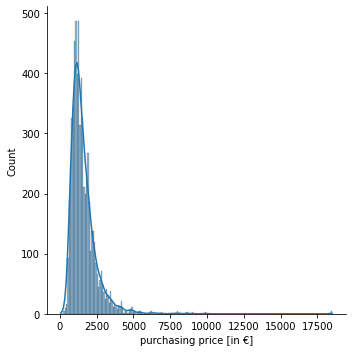

In [9]:


sns.displot(data=df, x="purchasing price [in €]", kde=True);


In [10]:


description = df.describe()
description



,purchasing price [in €],number of rooms,square metre,crime rate,Population - german with migration background,Population - not german,Population - total (0 to 17),Population - not german (0 to 17),Population - total (18 to 64),Population - not german (18 to 64),...,Private households by children - with child/children 3+,Migration rates - Internal migration,Migration rates - Exterior migration,Migration rates - overall migration,Migration rates by nationality - Internal migration (german),Migration rates by nationality - Internal migration (not german),Migration rates by nationality - Exterior migration (german),Migration rates by nationality - Exterior migration (not german),Migration rates by nationality - overall migration (german),Migration rates by nationality - overall migration (not german)
count,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,...,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000,6466.000000
mean,1607.829879,2.240643,69.595246,0.042020,17.237751,28.240752,15.345206,9.912233,67.522502,79.330575,...,9.977034,0.481070,-3.580019,-3.111243,0.571250,0.006990,-13.337689,20.729075,-12.768435,20.745685
std,971.584947,1.218671,40.372711,0.025444,2.424650,4.464113,2.306267,2.339626,4.020202,1.991571,...,1.873678,12.376374,4.503574,11.769235,10.572492,20.007793,3.845286,12.372434,11.150788,20.713149
min,60.000000,1.000000,20.420000,0.010000,13.400000,23.300000,10.000000,5.600000,62.900000,75.800000,...,7.100000,-23.300000,-11.100000,-21.000000,-20.200000,-51.100000,-19.200000,-4.400000,-31.500000,-28.300000
25%,1050.000000,1.000000,41.210000,0.030000,15.600000,24.200000,13.900000,8.400000,63.900000,78.300000,...,8.500000,-9.000000,-4.800000,-11.200000,-7.100000,-14.000000,-16.300000,10.700000,-19.500000,11.700000
50%,1390.000000,2.000000,64.000000,0.040000,16.700000,27.800000,15.200000,10.000000,67.200000,78.700000,...,10.100000,2.500000,-3.800000,-2.300000,0.800000,4.300000,-13.600000,20.800000,-14.700000,22.500000
75%,1900.000000,3.000000,86.475000,0.040000,19.100000,30.400000,17.200000,11.600000,70.300000,80.300000,...,11.300000,8.400000,-2.500000,4.600000,8.700000,11.300000,-10.900000,27.900000,-7.600000,30.100000
max,18500.000000,24.000000,700.000000,0.130000,22.700000,42.000000,20.100000,13.700000,77.900000,85.100000,...,13.500000,26.600000,9.800000,26.700000,25.500000,36.900000,1.300000,48.000000,15.800000,62.300000


In [11]:
avgkaufpreis = df["purchasing price [in €]"].mean()

In [12]:


bins = [0] + list(description["purchasing price [in €]"][
    ["25%", "50%", "75%"]
].astype(int)) + [np.inf]
print(bins) # 0 bis 119.500 = 0 - 25% Quantil, 119.500 bis 179.700 = 25 - 50% Quantil, ...



[0, 1050, 1390, 1900, inf]


In [13]:


df["house_cat"] = pd.cut(
    df["purchasing price [in €]"],
    bins=bins,
    labels=["0 - 25%", "25 - 50%", "50 - 75%", "75 - 100%"]
)



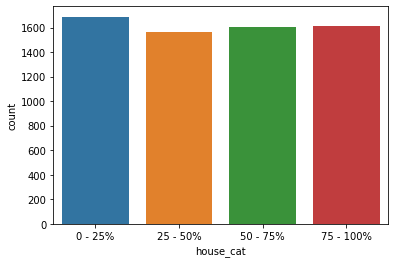

In [14]:


sns.countplot(data=df, x="house_cat");



In [15]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
for train_index, test_index in split.split(df, df["house_cat"]):
    df_train = df.loc[train_index]
    df_test = df.loc[test_index]

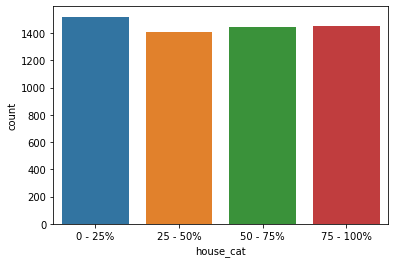

In [16]:


sns.countplot(data=df_train, x="house_cat");



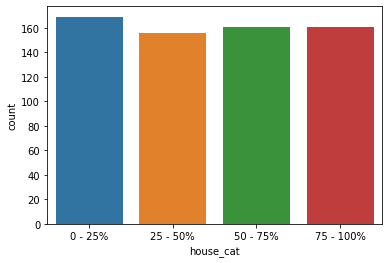

In [17]:


sns.countplot(data=df_test, x="house_cat");



In [18]:


df_train = df_train.drop("house_cat", axis=1)
df_test = df_test.drop("house_cat", axis=1)





# Correlation calculation

In [19]:
df_train.corr()["purchasing price [in €]"].abs().sort_values(ascending=False)

purchasing price [in €]                                                      1.000000
square metre                                                                 0.848383
number of rooms                                                              0.716893
Inner-city migration movements by origin and destination city district 1     0.194274
Population  - widowed                                                        0.145722
                                                                               ...   
Migration rates - Exterior migration                                         0.014635
Migration rates by nationality - Exterior migration (not german)             0.008955
Inner-city migration movements by origin and destination city district 7     0.008003
Inner-city migration movements by origin and destination city district 18    0.006919
Population  - Religion (none)                                                0.001715
Name: purchasing price [in €], Length: 67, dtype: floa

In [20]:
def engineer_features(df):
    df["ratio_rooms"] = df["square metre"] / df["number of rooms"]
    return df

In [21]:


df_train = engineer_features(df_train)
df_test = engineer_features(df_test)



In [22]:

dfcorr = df_train.corr()["purchasing price [in €]"].abs().sort_values(ascending=False)

dfcorr.head(50)

purchasing price [in €]                                                           1.000000
square metre                                                                      0.848383
number of rooms                                                                   0.716893
ratio_rooms                                                                       0.278457
Inner-city migration movements by origin and destination city district 1          0.194274
Population  - widowed                                                             0.145722
Population  - single                                                              0.141088
Private households by household type - Single parent with minor child/children    0.140540
Private households by household size - household size in persons (2)              0.136408
Population  - married                                                             0.135267
Private households by household type - Single person household                    0.134610

# ML-Coding

In [23]:


!pip3 install scikit-learn==1.0.0



In [24]:
import os # u.a. zur Entwicklugn plattformübergreifender Systempfade
import pandas as pd # Datenmanagement
import numpy as np # Hilfsfunktionen für mathematische Operationen

# Datenvisualisierung
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.model_selection import StratifiedShuffleSplit, train_test_split # Datensplits
from sklearn.linear_model import LinearRegression # Machine Learning
from sklearn import metrics # Modellevaluierung

## eigene Funktionen
##def filter_df_by_proximity(df, proximity):
##    return df.loc[df["ocean_proximity"] == proximity]

##def engineer_features(df):
##    df["ratio_bedrooms"] = df["total_bedrooms"] / df["total_rooms"]
##    df["people_per_household"] = df["population"] / df["households"]
##    return df

##def get_features_and_targets(df):
##    X = df.drop(["median_house_value"], axis=1).values
##    y = np.stack(df["median_house_value"])
##    return X, y

In [25]:
#df2 = pd.read_csv('final test python.csv') # Wir lesen die Datei housing.csv ein

#del df2['scraped location']

#del df2['City district']
#del df2['Indikatoren 2021.city district']


In [26]:
import os
import tarfile
import urllib.request

#df2 = pd.read_csv('final test python.csv') # Wir lesen die Datei housing.csv ein
df1=df

df2= df1.drop(['scraped location','city district','geo_location']  , 1)



df2 = df2.dropna() # löscht alle Zeile mit fehlenden Attributen
df2 = df2.reset_index(drop=True) # zählt unsere Daten neu durch

def get_features_and_targets(df2):
    X = df2.drop(["purchasing price [in €]"], axis=1).values
    y = np.stack(df2["purchasing price [in €]"])
    return X, y

description = df2.describe()

bins = [0] + list(description["purchasing price [in €]"][
    ["25%", "50%", "75%"]
].astype(int)) + [np.inf]

df2["house_cat"] = pd.cut(
    df2["purchasing price [in €]"],
    bins=bins,
    labels=["0 - 25%", "25 - 50%", "50 - 75%", "75 - 100%"]
)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
for train_index, test_index in split.split(df2, df2["house_cat"]):
    df2_train = df2.loc[train_index]
    df2_test = df2.loc[test_index]
    
df2_train = df2_train.drop("house_cat", axis=1)
df2_test = df2_test.drop("house_cat", axis=1)

##df_train = df_train.drop(filter_df_by_proximity(df_train, "ISLAND").index)
##df_test = df_test.drop(filter_df_by_proximity(df_test, "ISLAND").index)

##df_train = engineer_features(df_train)
##df_test = engineer_features(df_test)

df2_train_ml = pd.get_dummies(df2_train) # One-Hot Encoding
df2_test_ml = pd.get_dummies(df2_test)

X_train, y_train = get_features_and_targets(df2_train_ml)
X_test, y_test = get_features_and_targets(df2_test_ml)




clf = LinearRegression()
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


LinearRegression()

In [27]:


predictions = clf.predict(X_test)



In [28]:
print("Prediction\t|True Value")
print("-"*30)
for idx, (pred, annotation) in enumerate(zip(predictions, y_test)):
    if idx == 25:
        break
    pred = int(pred)
    annotation = int(annotation)
    print(f"{pred}\t\t|{annotation}")

Prediction	|True Value
------------------------------
1512		|1471
2137		|2500
1579		|1585
1300		|1540
1729		|1283
1737		|2100
758		|570
2480		|3100
1214		|1130
2577		|2730
1169		|1250
682		|760
1368		|2160
1072		|1080
2376		|1992
2177		|2800
1521		|1900
2020		|2195
490		|1120
1521		|1680
2756		|2900
528		|792
2635		|4805
1645		|1600
473		|325


In [29]:
mae = metrics.mean_absolute_error(y_test, predictions)
mae_ratio = metrics.mean_absolute_percentage_error(y_test, predictions)
r2_score = metrics.r2_score(y_test, predictions)


In [30]:


print(f"Wir können durchschnittlich mit einem Fehler von {np.round(mae)} rechnen;")
print(f"Das entspricht im Schnitt einer Fehlerquote von {np.round(mae_ratio * 100)}%;")
print(f"Der R^2 Werte liegt bei {np.round(r2_score * 100)}%")


Wir können durchschnittlich mit einem Fehler von 289.0 rechnen;
Das entspricht im Schnitt einer Fehlerquote von 20.0%;
Der R^2 Werte liegt bei 76.0%


In [31]:


df2_test.iloc[0]



purchasing price [in €]                                                  1471
number of rooms                                                             2
square metre                                                             56.6
crime rate                                                               0.04
Population  - total                                                 62,315.00
                                                                      ...    
Migration rates by nationality - Internal migration (not german)        -18.3
Migration rates by nationality - Exterior migration (german)            -12.6
Migration rates by nationality - Exterior migration (not german)         30.0
Migration rates by nationality - overall migration (german)             -12.9
Migration rates by nationality - overall migration (not german)          11.7
Name: 1097, Length: 114, dtype: object

array([2.00e+00, 5.66e+01, 4.00e-02, ..., 0.00e+00, 0.00e+00, 0.00e+00])

In [33]:


single_pred = clf.predict([X_test[0]])[0]
print(f"Die Prognose liegt bei {single_pred}.")
print(f"Der Realwert war {y_test[0]}.")



Die Prognose liegt bei 1512.7236328125.
Der Realwert war 1471.
